# Analyzing UCL Stats from 1993-2020

The UCL Statistics dataset is an archive of football statistics for different teams during the period 1992-2020 in the UEFA Champions League - an annual football championship where football clubs from Europe's top divisions compete. The dataset was shared on kaggle by Abu Bakar (kaggle.com/bakar31)

In this analysis, we will try to observe the data closely for interesting trends and recurrences in the winners and losers, and try to see if there are features that are indicative of how strong a team was. We will tool modules such as numpy and pandas and tools such as matplotlib and seaborn to visualize the data.

This analysis is a Course Project for Jovian and FreeCodeCamp's Data Analysis Course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Downloading the Dataset

**GETTING READY** - Before we begin the analysis, we have to download the dataset from kaggle and unzip the package to retrieve a csv file

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Saving the dataset URL in a variable
dataset_url = 'https://www.kaggle.com/bakar31/ucl-statistics' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brusheikh
Your Kaggle Key: ········


100%|██████████| 7.59k/7.59k [00:00<00:00, 4.97MB/s]

The dataset has been downloaded and extracted.

In [4]:
# creating a data directory
data_dir = './ucl-statistics'

In [5]:
import os
os.listdir(data_dir)

['ucl_stats.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-ucl-stats"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'

## Data Preparation and Cleaning

**FIRST STEPS** - The analysis requires cleaned data that has been handled for all the discrepancies. We this begin with that stage



In [10]:
import pandas as pd;
import numpy as np;

In [11]:
stats_raw_df = pd.read_csv('/home/jovyan/ucl-statistics/ucl_stats.csv')

In [12]:
stats_raw_df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
0,1993,Marseille,6,3,3,0,14,4,10,9,1
1,1993,Milan,7,6,0,1,11,2,9,12,0
2,1993,Rangers,6,2,4,0,7,5,2,8,0
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0
...,...,...,...,...,...,...,...,...,...,...,...
715,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0
716,2020,Valencia,8,3,2,3,13,15,-2,11,0
717,2020,Chelsea,8,3,2,3,12,16,-4,11,0
718,2020,Ajax,6,3,1,2,12,6,6,10,0


**Thus, our stats_raw_df Pandas dataframe of the raw data has 720 rows and 11 columns**

In [13]:
stats_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            720 non-null    int64 
 1   team            720 non-null    object
 2   match_played    720 non-null    int64 
 3   wins            720 non-null    int64 
 4   draws           720 non-null    int64 
 5   losts           720 non-null    int64 
 6   goals_scored    720 non-null    int64 
 7   goals_conceded  720 non-null    int64 
 8   gd              720 non-null    int64 
 9   group_point     720 non-null    int64 
 10  champions       720 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 62.0+ KB


*From the above information, it is clear that all 11 columns have non null values, 10 of which are integer values while the Team column is an object as it has the names of the teams.*

In [14]:
stats_raw_df.describe()

,year,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2008.688889,7.659722,2.920833,1.830556,2.911111,10.522222,10.490278,0.091667,8.133333,0.038889
std,7.351526,2.097628,2.316563,1.277454,1.248259,6.982757,3.669961,7.645660,4.213562,0.193465
min,1993.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-22.000000,-8.000000,0.000000
25%,2004.000000,6.000000,1.000000,1.000000,2.000000,5.000000,8.000000,-5.000000,5.000000,0.000000
50%,2009.000000,6.000000,2.000000,2.000000,3.000000,9.000000,10.000000,0.000000,8.000000,0.000000
75%,2015.000000,8.000000,4.000000,3.000000,4.000000,14.000000,13.000000,5.000000,11.000000,0.000000
max,2020.000000,13.000000,11.000000,7.000000,6.000000,43.000000,24.000000,35.000000,18.000000,1.000000


*The above statistics give us some interesting insights into the range of values of our columns, esp. about wins, goals scored and goals conceded.*

In [15]:
#Checking whether there are as many champions as the number of years
stats_raw_df['champions'].sum()

28

In [16]:
#Adding and extra column for win percentage
stats_raw_df['win_percent'] = (stats_raw_df['wins']/stats_raw_df['match_played'])*100
stats_raw_df

,year,team,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions,win_percent
0,1993,Marseille,6,3,3,0,14,4,10,9,1,50.000000
1,1993,Milan,7,6,0,1,11,2,9,12,0,85.714286
2,1993,Rangers,6,2,4,0,7,5,2,8,0,33.333333
3,1993,Club Brugge,6,2,1,3,5,8,-3,5,0,33.333333
4,1993,CSKA Moscow,6,0,2,4,2,11,-9,2,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2020,Zenit Saint Petersburg,6,2,1,3,7,9,-2,7,0,33.333333
716,2020,Valencia,8,3,2,3,13,15,-2,11,0,37.500000
717,2020,Chelsea,8,3,2,3,12,16,-4,11,0,37.500000
718,2020,Ajax,6,3,1,2,12,6,6,10,0,50.000000


In [18]:
#Creating a new dataframe now that the raw data has been processed
stats_df = stats_raw_df

In [19]:
#Creating a new dataframe for the champions
champs_df = stats_df[stats_df['champions'] == 1]
champs_df.shape

(28, 12)

In [20]:
import jovian

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'

## Exploratory Analysis and Visualization

**HEART OF THE MATTER** - Now that we have imported the data into a dataframe, checked it for missing values or discrpancies and done with the little modifications, we are good to go and pursue some actual analysis. 

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**STEP 1** - Let's check the number of teams that have participated in the tournament every year

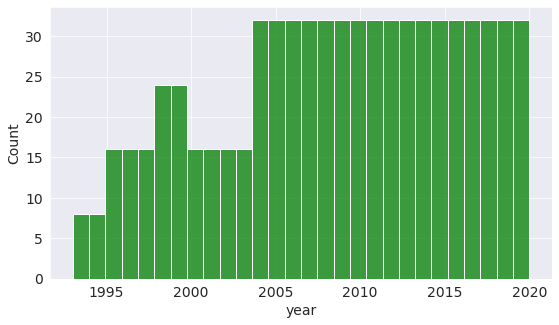

In [23]:
#Number of participating teams every year
sns.histplot(data = stats_df,
                x = 'year',
             bins = 28,
            color = 'green');

*It's evident that the number of participating teams has increased steadily over the years as a general trend and has flattened post 2005, going from mere 8 in 1993 to 32 in 2020.*

**STEP 2** - Let's now check if the number of goals shows a seimilar year-wise trend over the entire span of 28 years as that of the number of participating teams

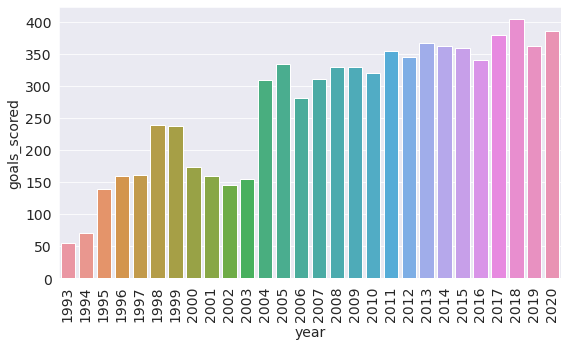

In [201]:
goals_plt = sns.barplot(data = stats_df,
               x = 'year',
               y = 'goals_scored',
       estimator = sum,
              ci = 0);
plt.xticks(rotation =90);

*Thus, we can observe that the trend in goals scored follows the number of teams barring the point that the increase continues beyond 2007, albiet marginally while the the number of teams did not increase in that time period*

**STEP 3** - Let's now have a look at the teams that have been crowned champions

In [167]:
champs_arr = champs_df['team'].unique().tolist()
champions_arr2 = stats_df['team'].isin(champs_arr)
champions = stats_df[champions_arr2]

champions_cum = champions.groupby(['team']).sum()
champions_cum['win_percent'] = champions_cum['wins']*100/champions_cum['match_played']
champions_cum = champions_cum.drop(['year'], axis = 1)

champions_top6 = champions_cum.sort_values(['champions'], ascending = False).head(6)
champions_cum


,match_played,wins,draws,losts,goals_scored,goals_conceded,gd,group_point,champions,win_percent,matches_not_won
team,,,,,,,,,,,
Ajax,114,46,31,37,157,129,28,128,1,40.350877,68
Barcelona,227,136,57,40,458,226,232,287,4,59.911894,91
Bayern Munich,227,133,43,51,463,233,225,280,3,58.590308,94
Borussia Dortmund,104,51,19,33,171,123,48,129,1,49.038462,53
Chelsea,157,77,45,36,270,156,114,194,1,49.044586,80
Internazionale,99,47,24,28,136,110,32,121,1,47.474747,52
Juventus,170,87,39,43,264,161,100,211,1,51.176471,83
Liverpool,110,55,27,28,190,112,77,112,2,50.000000,55
Manchester United,200,103,54,43,327,185,142,255,2,51.500000,97


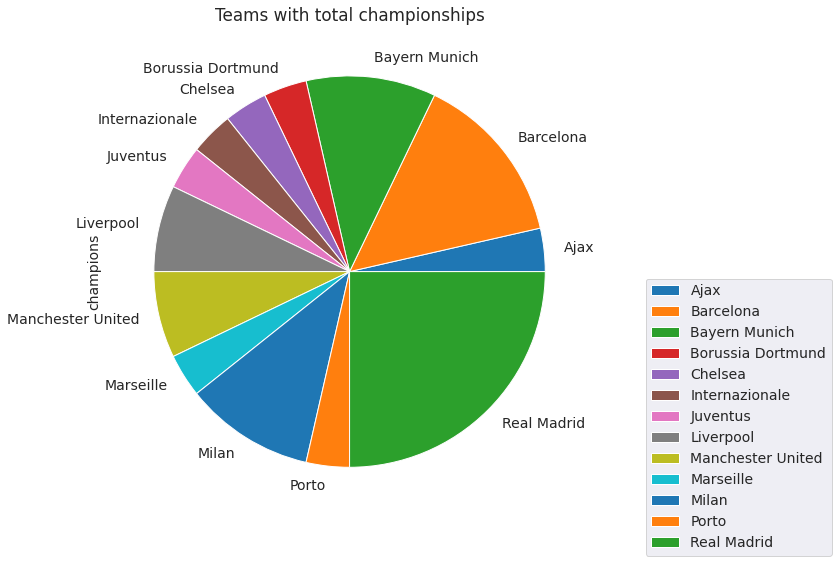

In [127]:
pie1 = champions_cum.plot.pie(y = 'champions', figsize = (9,9));
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 1, 0.5));
pie1.set_title('Teams with total championships');

*Here we learn that only 4 teams have won the UCL more than thrice, with Real Madrid topping the chart with a record 7-UCL-era titles*

**STEP 4** - Let's check out how the Top 6 champion teams have performed over the years

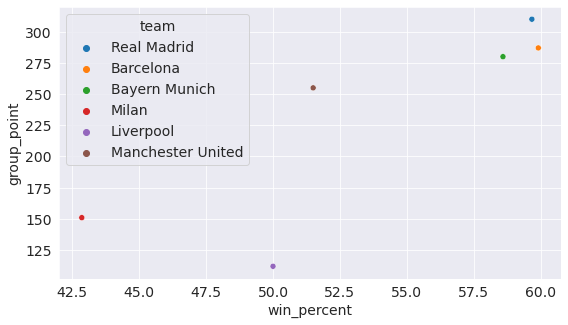

In [200]:
win_percent_plt = sns.scatterplot(data = champions_top6,
                  x  = 'win_percent',
                  y  = 'group_point',
               hue   = 'team');


*Thus,Milan have the lowest win percentage in the top 6 while Liverpool have earned the lowest group points. Real Madrid and Barcelona, on the other hand the tallies*

**STEP 5** - Let us now see how the champion teams have scored over the years.

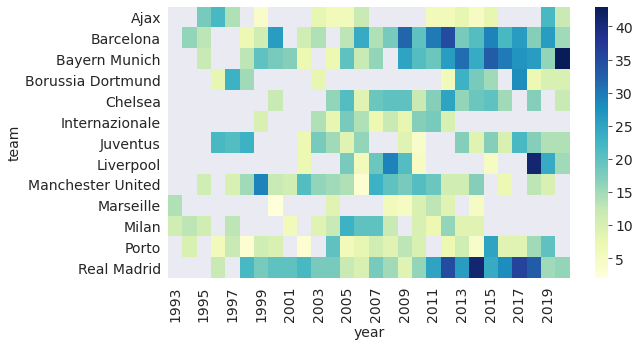

In [41]:
yearwise_df = champions.pivot('team','year','goals_scored')
hm1 = sns.heatmap(yearwise_df, cmap= 'YlGnBu');


*We can thus infer that the number of goals per season have more or less increased over the years. Real Madrid, Barcelona and Bayern Munich have been the most consistent of the lot*

Let us save and upload our work to Jovian before continuing

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'

## Asking and Answering Questions

Now that we have visualised the data and made some observations, it is time to pose some questions that let us understand the trends in data and help us draw some inferences



#### Q1: Are the number of goals scored indicative of a title win?

In [126]:
max_points = stats_df.groupby('year')['group_point'].max()
champ_points_df = champs_df[['year','group_point']]
champ_points = champ_points_df.iloc[:,1]
year_points = champ_points_df.iloc[:,0]


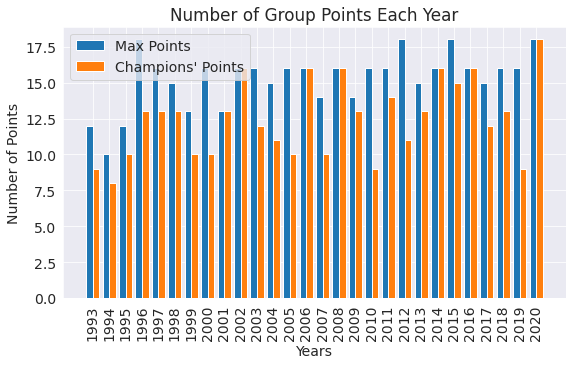

In [193]:
  
max_plt = plt.bar(year_points - 0.2, max_points, 0.4, label = 'Max Points')
champ_plt = plt.bar(year_points + 0.2, champ_points, 0.4, label = "Champions' Points")

X_axis = np.arange(len(year_points))

plt.xticks(year_points, rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Points")
plt.title("Number of Group Points Each Year")
plt.legend()
plt.show()


**Answer 1**: The champions have mostly scored less points than the maximum points that season, hence it is not an indication of a title win

#### Q2: How much does a team's defence impact its chances of being crowned the champions?

In [139]:
least_goals = stats_df.groupby('year')['goals_conceded'].min()
champ_def = champs_df[['year','goals_conceded']]
champ_defence = champ_def.iloc[:,1]
year_points_def = champ_def.iloc[:,0]


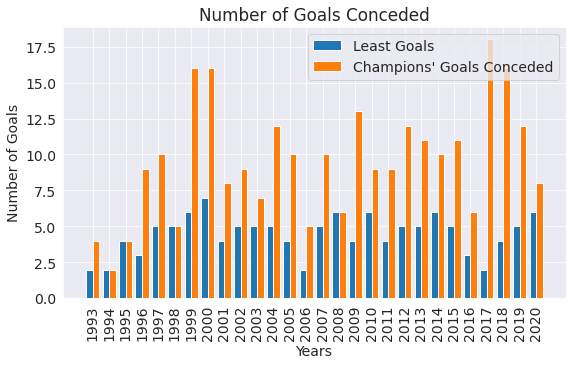

In [192]:
least_goals_plt = plt.bar(year_points_def - 0.2, least_goals, 0.4, label = 'Least Goals')
plt.bar(year_points_def + 0.2, champ_defence, 0.4, label = "Champions' Goals Conceded")

X_axis = np.arange(len(year_points_def))

plt.xticks(year_points_def, rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Goals")
plt.title("Number of Goals Conceded")
plt.legend()
plt.show()


**Answer 2**: The second hypothesis falls through as the title winners had the least conceded goals only thrice.

#### Q3: Which teams have the highest win percentage in the UCL?

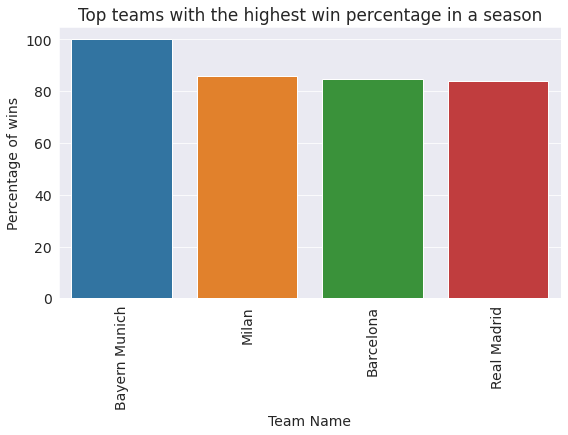

In [191]:
win_per_df = stats_df.sort_values('win_percent', ascending = False).head(5)

wins_plt = sns.barplot(
            data = win_per_df,
               x = 'team',
               y = 'win_percent',
              ci = 0);
plt.xticks(rotation =90);
plt.xlabel('Team Name');
plt.ylabel('Percentage of wins');
plt.title('Top teams with the highest win percentage in a season');

**Answer 3**: Thus, we now have the list of teams with the highest win percentage in a season

#### Q4: How often does a title winner lose in a campaign?

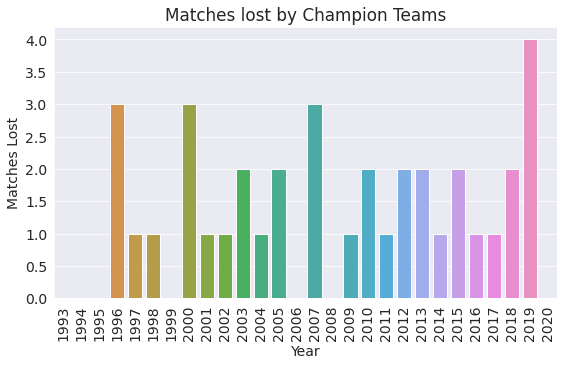

In [189]:
lose_plt = sns.barplot(data = champs_df,
                          x = 'year',
                          y = 'losts',
                         ci = 0);
plt.xticks(rotation =90);
plt.xlabel('Year');
plt.ylabel('Matches Lost');
plt.title('Matches lost by Champion Teams');

In [164]:
champs_df['losts'].median()

1.0

**Answer 4**: The median games a champion team has lost in a season is 1. On six occassions, the champions have not lost any matches at all. Hence, Matches lost is a good indicator of a title win.

#### Q5: What are the most successful teams in the group stages?

In [187]:
champions_cum['points_per_game'] = champions_cum['group_point']/champions_cum['match_played']
champions_cum = champions_cum.sort_values('points_per_game', ascending = False)
champions_cum['points_per_game']

team
Real Madrid          1.275720
Manchester United    1.275000
Barcelona            1.264317
Porto                1.247059
Juventus             1.241176
Borussia Dortmund    1.240385
Chelsea              1.235669
Bayern Munich        1.233480
Internazionale       1.222222
Ajax                 1.122807
Milan                1.027211
Liverpool            1.018182
Marseille            0.766667
Name: points_per_game, dtype: float64

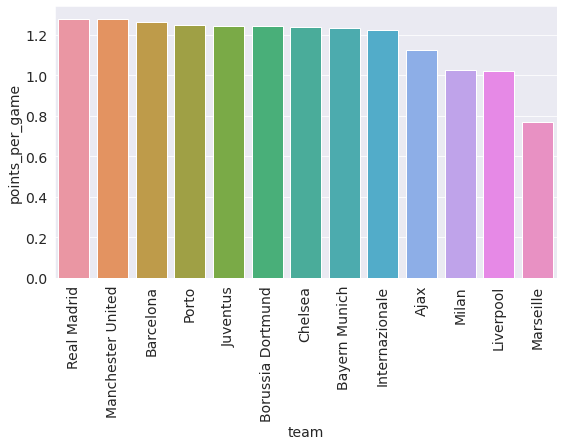

In [188]:
grp = sns.barplot(x = champions_cum.index, y = champions_cum['points_per_game']);
plt.xticks(rotation = 90);

**Answer 5**: Real Madrid, Manchester United and Barcelona have been the top 3 most consistent teams in the UCL Group stages

Let us save and upload our work to Jovian before continuing.

In [194]:
import jovian

In [195]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'

## Inferences and Conclusion

**What We Learned** - Through this analysis, we can now infer that:
1. The competition has flourished over the years in terms of number of teams and number of goals scored
2. Real Madrid, Barcelona, Bayern Munich, Manchester United, Milan and Liverpool have been the top 6 teams in the UCL era
3. The number of goals scored in a season may not necessarily be an indicator of the team's title win chances. However, champion teams do lose one game on average in a season
4. Bayern Munich have had the most successful season winning all of their games in the 2020 season.
5. Real Madrid are the team with the highest number of titles (7) followed by Barcelona (4) and Bayern Munich (3)

In [196]:
import jovian

In [197]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'

## References and Future Work

**References** :
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
2. https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
4. https://www.w3schools.com/python/matplotlib_pie_charts.asp

**Future Work** : This data can be used to create a title prediction machine learning model. The author also attempts data analysis here: https://www.kaggle.com/bakar31/ucl-stats-analysis

In [198]:
import jovian

In [199]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "patswap/zerotopandas-course-project-ucl-stats" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats


'https://jovian.ai/patswap/zerotopandas-course-project-ucl-stats'